<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_70_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 70: kNN Classification-2




In today's class, we will start exploring a simple algorithm called **k-Nearest Neighbours (kNN)**  that is well equipped and has the capability to outperform many complex algorithms.






---

#### Problem Statement

Safe drinking water is essential for every forms of life on earth. for public health. The United Nation (UN) and other countries declared access to safe drinking water as a fundamental human right. This is important as a health and development issue at a national, regional, and local level.

You are provided with a dataset consisting of water quality metrics for 3276 different water bodies. Your job is to  create a model to determine if the sample tested from the water body is fit for human consumption or not.

Following are the attributes of this dataset:


1. `ph`: The pH value indicates the acidic or alkaline condition of water status. The pH of pure water is 7. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.

2. `Hardness`: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels.

3. `Solids`: Also known as TDS (total dissolved solids). Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, etc. These minerals produced un-wanted taste and diluted colour in appearance of water.  The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l prescribed for drinking purposes.

4. `Chloramines`: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per litre ($mg/L$ or 4 parts per million (ppm)) are considered safe in drinking water.

5. `Sulfate`: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks.  Sulfate concentration in seawater is about 2,700 milligrams per litre ($mg/L$). It ranges from 3 to 30 $mg/L$ in most freshwater supplies.


6. `Conductivity`: Pure water is not a good conductor of electric current rather’s a good insulator.  Electrical conductivity (EC) measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceed 400 micro siemens per centimetre ($\mu S/cm$).

7. `Organic_carbon`: Total Organic Carbon (TOC) is a measure of the total amount of carbon in organic compounds in pure water.

8. `Trihalomethanes`: Trihalomethanes (THMs) are chemicals that may be found in water treated with chlorine. THM levels up to 80 ppm is considered safe in drinking water.

9. `Turbidity`: The turbidity of water depends on the quantity of solid matter present in the suspended state. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. `Potability`: Indicates if water is safe for human consumption where `1` means Potable and `0` means Not potable.


**Dataset Credits:** https://www.kaggle.com/adityakadiwal/water-potability







In [ ]:
# Import the Python modules and the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

water_df = pd.read_csv("/content/water potability.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


We can see that this is a binary classification problem statement where the target label `Potability` can have only two possible values: `0` and `1`. Hence, we will build a model that can predict quality of a water sample using a classification algorithm called kNN.


Let's first understand kNN classification in detail using a simple example. Thereafter, we will solve the above problem statement.


---

#### Activity 1: Understanding kNN


 The k-Nearest Neighbours (kNN) is a simple algorithm that is used for both classification and regression problems in Machine Learning. Let us first understand how kNN classification works  using a simple example.

Imagine that we were presented with two features of balls i.e `size` and `weight` and a target label `category` (`0` = tennis ball and `1` = soccer ball):


|size|weight|category|
|-|-|-|
|10|150|0|
|11|190|0|
|15|190|0|
|12|160|0|
|18|200|1|
|20|220|1|
|21|230|1|
|22|245|1|

Let us create a two-dimensional numpy array storing the size and weights of balls and a separate numpy array that contains the category values.


In [ ]:
# Create a 2D numpy array of balls size and weights.
# Create an array consisting of category values.

balls_arr = np.array([[10, 11, 15, 12, 18, 20, 21, 22],
                      [150, 190, 190, 160, 200, 220, 230, 245]])
category_arr = np.array([0, 0, 0, 0, 1, 1, 1, 1])


Create a scatter plot with size on the $x$-axis and weight on the $y$-axis and colour code the data points based on the categories of balls.  

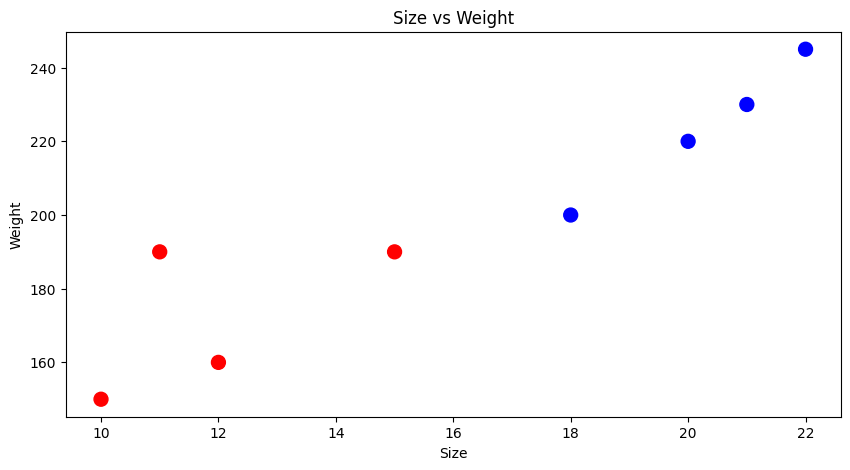

In [ ]:
# Create a scatter plot for size vs weight.
plt.figure(figsize = (10, 5))
color_arr = np.array(['r', 'b'])

plt.scatter(balls_arr[0], balls_arr[1], s = 100,  c = color_arr[category_arr])
plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Size vs Weight')
plt.show()

Suppose there is a new ball (marked as **X**) whose size is `16` and weight is `200` as seen in the figure below:

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/572dd9e9-c093-4b5f-b6a2-7586493aace1.png"/>

`Fig 1.1: Predicting label of new data point`
</center>

Our task is to classify this new ball into either  class <font color = red><b>$0$ </b></font> or   class <font color = blue><b>$1$ </b></font>.

Suppose the value of $k$ is 3. The kNN algorithm starts by calculating the distance of point **X** from all the points. It will then find the 3 nearest points having least distance to point **X**. This is shown in the figure below. The three nearest points have been encircled.

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/2bf6a3c6-9ff2-4d9b-b89a-c9235b852c6a.png"/>

`Fig 1.2: When k = 3`
</center>

The final step of the kNN algorithm is to assign new point **X** to the class to which majority of the three nearest points belong. From the figure above, we can see that two of the three nearest points belong to class <font color = blue><b>$1$ </b></font> while one belongs to the class <font color = red><b>$0$ </b></font>. Therefore the new data point will be classified as <font color = blue><b>$1$ </b></font> i.e the new ball is a soccer ball.

Hence in kNN, $k$ is the number of nearest neighbours. $k$ is generally an odd number if the number of classes is 2.

The simplest case of kNN algorithm is when $k$ = 1.  In this case, we find the only 1 closest point to point **X** and then the label of the nearest point is assigned to **X**. Thus, for balls example, if $k$ = 1 then the predicted class would be  <font color = red><b>$0$ </b></font> as seen in the figure below:

<center>
<img src= "https://s3-whjr-v2-prod-bucket.whjr.online/111927ea-e7bb-4098-8f18-4d77ec60832a.png"/>

`Fig 1.3: When k = 1`
</center>

Hence, the number of neighbours $k$ is the core deciding factor in kNN. Thus, kNN classification has the following basic steps:
<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/63318078-30b6-4ed6-a88c-7d0cc1baea6d.png"/></center>

To find the distance between points, we use various distance measures in which Euclidean distance function is the most widely used one. Let us learn other distance functions that can be used in kNN.

---

#### Distance Functions

To measure the distance between points $A$ and $B$ in a feature space, the Euclidean distance function is the most widely used one.

However, depending on the context of the problem several distance metrics can be used.

Let $A$ and $B$  are represented by feature vectors
$A = (x_1, x_2, …, x_n)$ and $B = (y_1, y_2, …, y_n)$,  where $n$ is the dimensionality of the feature space.

**1. Manhattan Distance:**

Manhattan distance is calculated as the sum of the absolute differences between the two vectors.

\begin{equation}
d(A, B) = \sum _{i=1}^n |x_i - y_i|
\end{equation}

Thus, the Manhattan distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ is given by  $|x_1 – x_2| + |y_1 – y_2|$.

For example, consider two data points $A =(1, 2)$ and $B =(3, 4)$,

The Manhattan distance between these two points is calculated as:

\begin{equation}
d(A, B) = |3 -1|+|4-2| = 4
\end{equation}

**2. Euclidean  Distance:**

The Euclidean distance between two points is the length of a line segment between the two points.

<center>
<img src = https://s3-whjr-v2-prod-bucket.whjr.online/f57e2015-ba39-4646-933f-3cbaa2dac4df.png height=500></center>

The **Euclidean Distance** between  points  $A (x_1 , y_1)$, and $B (x_2 , y_2)$ can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem:

\begin{align}
  d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 }
\end{align}

For example, the Euclidean distance between $(1,2)$ and $(3, 4)$ is:
  
  $\sqrt{(3-1)^2 + (4-2)^2}=\sqrt{4 + 4} =\sqrt{8} = 2.828 $

**3. Minkowski Distance:**

It is a generalisation of the Euclidean distance and the Manhattan distance.

$$ d(A, B) = \sqrt[p]{{(x_1-y_1)}^p\ +\ {(x_2-y_2)}^p\ +\ ...\ +\ {(x_n-y_n)}^p}
$$

The value of $p$ in Minkowski Distance is set based on experimentation. The usual value of $p$ is either `2`, `3` or `4` for most problems. The exact value depends on the applications.
- When $p = 1$, Minkowski distance is same as Manhattan distance.
- When $p = 2$, Minkowski distance is same as Euclidean distance.

**4. Hamming Distance:**

 It is used for categorical variables. If the value of variable $x$ and the value of variable $y$ are the same, the distance $d_H$ will be equal to 0. Otherwise $d_H$ will be equal to 1.

\begin{align}
  d_H(x, y)= \sum_{i = 1}^k |x_i - y_i|
\end{align}
 - If $x = y$, then $d_H = 0$
 - If $x \neq y$, then $d_H = 1$


For example:

|Fruit|Sphere|Sweet|Sour|Crunchy|
|-|-|-|-|-|
|Apple|Yes|Yes|No|Yes|
|Banana|No|Yes|No|No|

Since each object is represented by 4 variables, we can say that each object has 4 dimensions. Thus, coordinate of Apple is (1, 1, 0, 1) and coordinate of Banana is (0, 1, 0, 0).

|Fruit|Sphere|Sweet|Sour|Crunchy|
|-|-|-|-|-|
|Apple|1|1|0|1|
|Banana|0|1|0|0|
|Is different|Yes|No|No|Yes|

Since there are 2 digits different here, we can say that the hamming distance between Apple and Banana is 2.


Now that we have understood the basic idea behind kNN classification, let us proceed with the water quality prediction problem statement.



---

#### Activity 2:  Data Preprocessing

Let's find out the total number of rows and columns, data types of columns and missing values (if exist) in the `water_df` DataFrame.


In [ ]:
#  Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


There are 3276 rows and 10 columns in the dataset. Also, all the columns are numeric, hence feature encoding is not needed.

Let us determine the columns having missing values using `isnull().sum()` function.

In [ ]:
#  Check missing values using the 'isnull().sum()' function.
water_df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Also, determine the percentage of missing values in each column of the DataFrame.

In [ ]:
# Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

,0
ph,14.987790
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,23.840049
Conductivity,0.000000
Organic_carbon,0.000000
Trihalomethanes,4.945055
Turbidity,0.000000
Potability,0.000000


`Sulfate` has highest percentage of missing values in the dataset, followed by `ph` and `Trihalomethans`.

Now, let's replace the null values of the columns with their median values as mean gets pulled in the direction of outliers. Again check whether there are still any null values in the dataset.

In [ ]:
#Handle missing value with median of features
water_df["ph"].fillna(value = water_df["ph"].median(), inplace = True)
water_df["Sulfate"].fillna(value = water_df["Sulfate"].median(), inplace = True)
water_df["Trihalomethanes"].fillna(value = water_df["Trihalomethanes"].median(), inplace = True)

After treating the missing values, check the percentage of missing values of the dataset.

In [ ]:
#  Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

,0
ph,0.0
Hardness,0.0
Solids,0.0
Chloramines,0.0
Sulfate,0.0
Conductivity,0.0
Organic_carbon,0.0
Trihalomethanes,0.0
Turbidity,0.0
Potability,0.0


Now that our DataFrame does not contain any missing values, let us perform exploratory data analysis and analyse the patterns in the dataset.

---

#### Activity 3: EDA and Data Preparation

For our dataset, the column `Potability` is the target variable and other columns except `Potability` are the feature variables.
Let us create a countplot to display the count of  each target class.

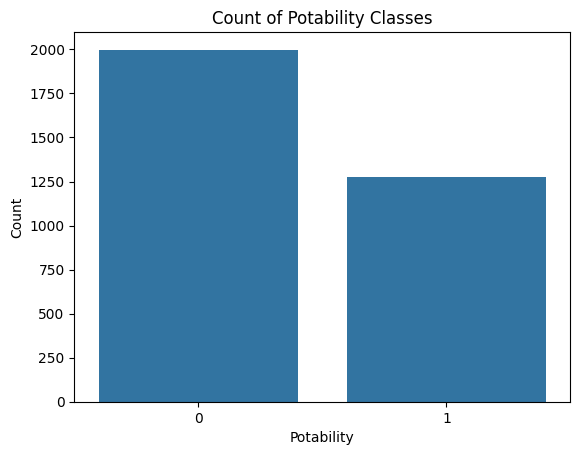

In [ ]:
sns.countplot(data=water_df, x='Potability')

# Adding labels and title for better understanding
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Count of Potability Classes')
plt.show()

Let us now check the feature distribution and outliers.

Use `boxplot()` function of `seaborn` module and pass the target variable `Potability` as  $x$-axis values and the other features as  $y$-axis values to create boxplots for all the features. Use subplots to display these boxplots.


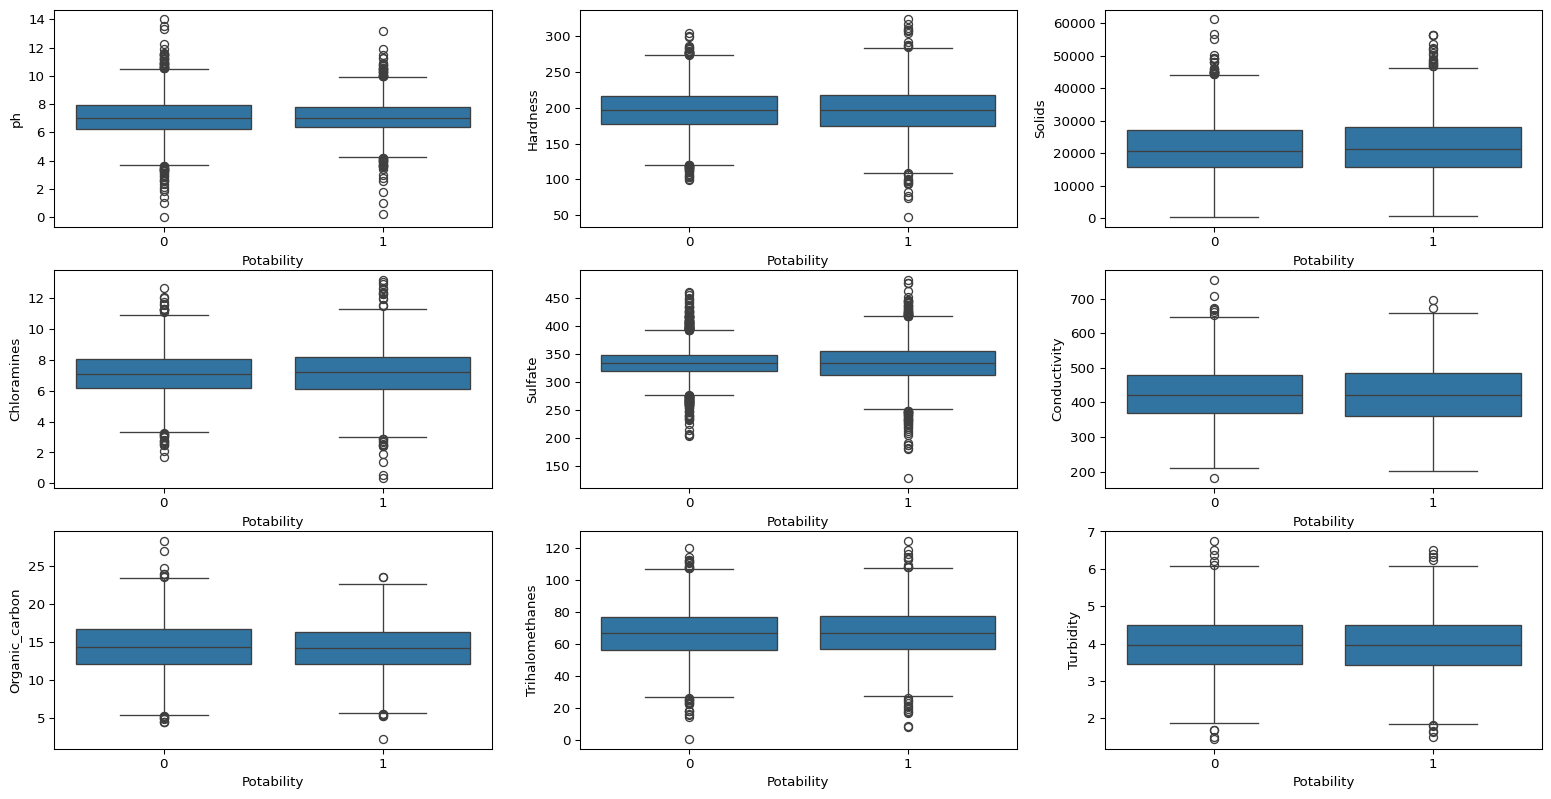

In [ ]:
#  Create boxplots for 'water_df' columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10), dpi = 96, sharex = False)
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.boxplot(x = 'Potability', y = column, data = water_df, ax = axis[i, j])
    count = count + 1

plt.show()


Here we see there are no significant outliers for any of the features.

Let us plot the histograms for all the features to understand the distribution of values of these features. Use subplots to display these histograms.

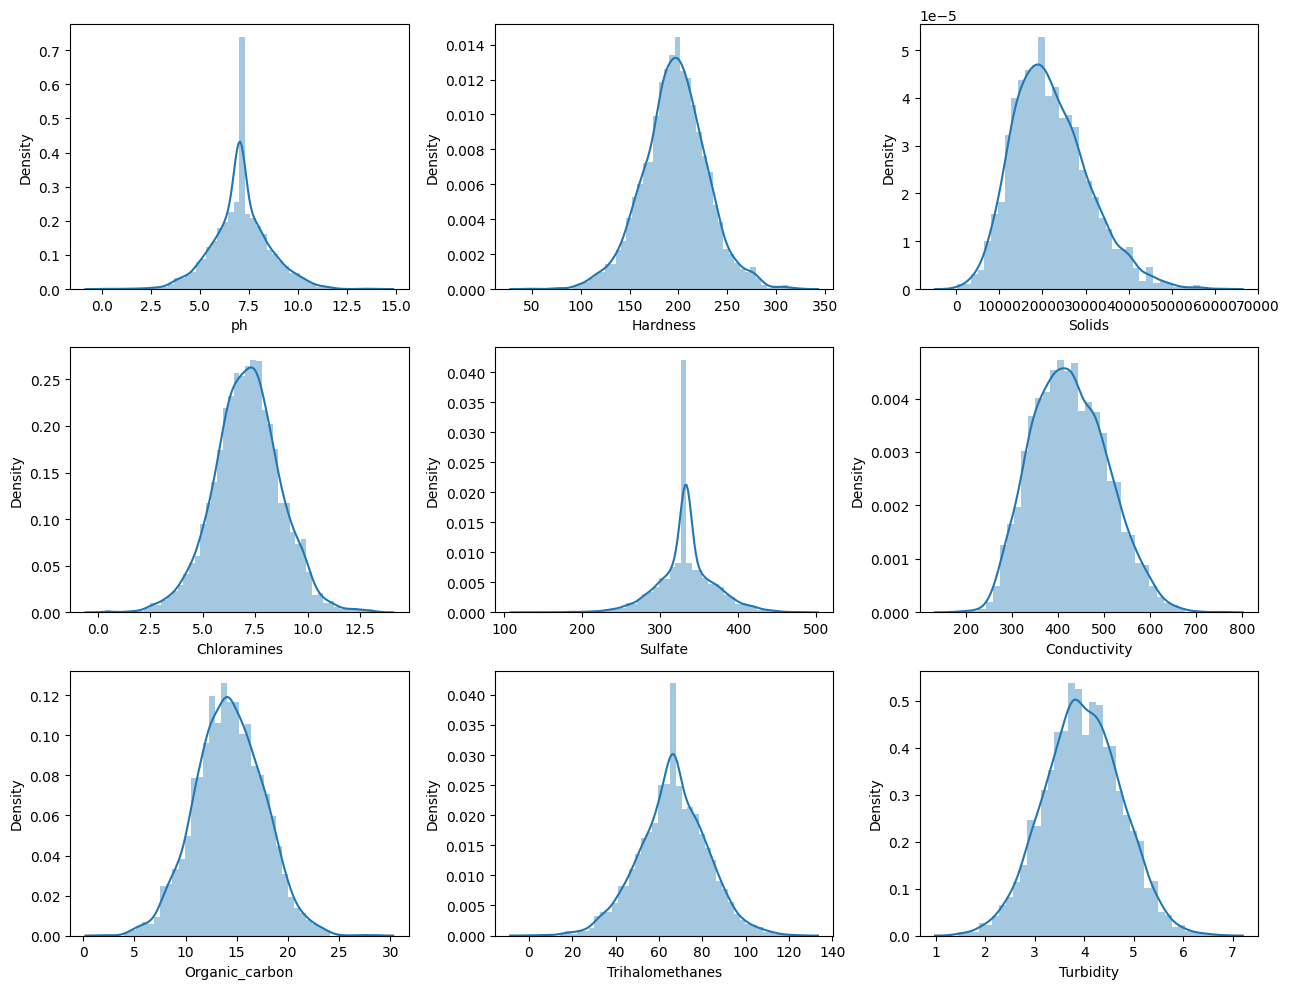

In [ ]:
#  Create histogram for numeric columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 10), dpi = 100)
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]      # Fetching the current column and all rows of that column.

    sns.distplot(column, hist = True, ax = axis[i, j])
    count = count + 1
    fig.tight_layout()

plt.show()

It's good to notice that our features are quite normally distributed. Next, we will try to understand the correlation between variables. For this, compute the correlation matrix among all the variables and plot a heat map.

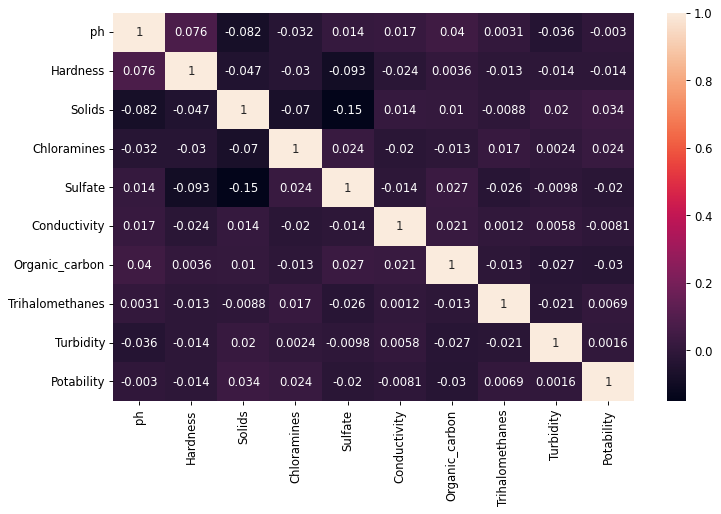

In [ ]:
# Check the correlation of features
corr_df = water_df.corr()
plt.figure(figsize = (10, 6), dpi = 84)
sns.heatmap(corr_df, annot = True)
plt.show()

From the above correlation heatmap, we can observe that none of the features exhibits a strong correlation with the target variable.

Let us now create two separate DataFrames, one containing the feature variables and other containing the target variable.

In [ ]:
#  Split the data into dependent and independent features
features_df = water_df.drop(['Potability'], axis = 1)
target_df = water_df['Potability']
features_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Use `StandardScaler` to scale the feature values.

In [ ]:
# Normalise the column values.
# Import 'StandardScaler' from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Make an object of StandardScaler
standard_scaler = StandardScaler()

# Fit and Transform the DataFrame
scaled_features = standard_scaler.fit_transform(features_df)

# Make a new DataFrame with the normalized values
X_scaled = pd.DataFrame(scaled_features)
X_scaled.columns = features_df.columns
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786


Hence, our dataset is now ready for model building and prediction.

Let us split the scaled dataset into train and test sets using `train_test_split()` function. Also, set `stratify = target_df` inside the `train_test_split()` function to obtain a balanced train/test dataset consisting of samples from each target label.


In [ ]:
#  Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_df, test_size = 0.3,
                                                    random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2293, 9)
Shape of X_test: (983, 9)
Shape of y_train: (2293,)
Shape of y_test: (983,)



In the next activity, we will perform kNN classification using `sklearn` module and evaluate the performance of the model.

#### Activity 1: Building kNN Classifier Model


**Generating Model for $k=3$:**

Let's build kNN classifier model for $k=3$ using the steps given below:
1. Import the `KNeighborsClassifier` class from the `sklearn.neighbors` module.
2. Create an object of this class using the following syntax:

  `KNeighborsClassifier(n_neighbors, metric)`
  
  Where,
  - `n_neighbors` is basically the value for the $k$. There is no ideal value for $k$ and it is selected after testing and evaluation, however to start out, we would select `3`  as the value of $k$.

  - `metric` is the distance metric. By default, it is `euclidean`. You may also use `manhattan` distance.
  

3. Call the `fit()` function using the classifier object and pass the train set as inputs to this function.

4. Call the `score()` function  using the classifier object  and pass the train set as inputs to determine the train set accuracy of the model.

5. Also, determine the accuracy score of the test set using the `score()` function.

In [ ]:
#  Train kNN classifier model for 'k = 3'
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn3.score(X_train, y_train))
print("Test set accuracy:", knn3.score(X_test, y_test))

Train set accuracy: 0.8146532926297427
Test set accuracy: 0.612410986775178


We can observe that the accuracy score for train set is very good. However, the test set accuracy is not that good. Let us try to improve the accuracy by creating a model for a different number of neighbours.

**Re-generating Model for $k = 7$:**

Let's build kNN classifier model for $k=7$.

In [ ]:
# Train kNN classifier model for 'k = 7'
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn7.score(X_train, y_train))
print("Test set accuracy:", knn7.score(X_test, y_test))

Train set accuracy: 0.7313563017880506
Test set accuracy: 0.6185147507629705


We can observe that the accuracy score for train set for $k = 7$ is less as compared to that of $k = 3$. However, there is slight improvement in the test set accuracy. Here, we have increased the number of neighbours in the model and test accuracy got increased. But, this is not necessary for each case that an increase in the number of neighbours increases the accuracy.

Thus, the question arises that *how to choose the optimal number of neighbours*? Let us find out.


---

#### Activity 2: Finding an Optimal $k$ Value

We need to find a value of $k$ which can give a  good train and test set accuracy. For this, we can determine the accuracy scores for neighbours from `1` to `20` and plot these scores using the steps given below:

1. Create two lists `accuracy_train` and `accuracy_test` to store the accuracy scores of train set and test set for various $k$ values.

2. Initiate a `for` loop that ranges from `1` to `20` with current iterator stored in variable `k`. Inside this `for` loop:
  - Create an object of `KNeighborsClassifier` class with `n_neighbors = k` as input.
  - Call the `fit()` function using the object of  `KNeighborsClassifier` class and pass train set as inputs to this function.
  - Determine the train set and test set accuracy scores for current `k` value and append these scores to the `accuracy_train` and `accuracy_test` lists respectively.

3. Visualise the  values of `accuracy_train` and `accuracy_test` lists using line plots.




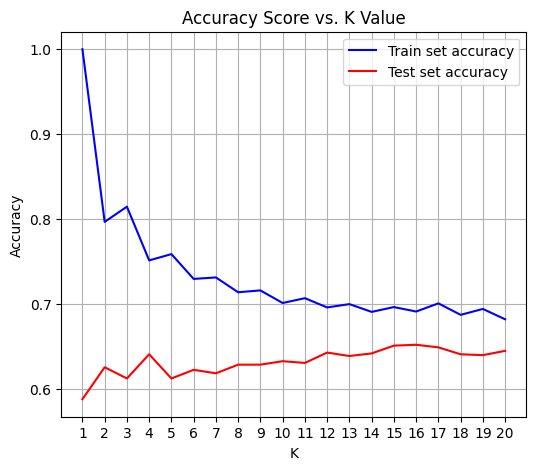

In [ ]:
# Plot accuracy scores of train and test sets for 1 to 20 neighbours.

# Create two lists store the accuracy scores of train and test set
accuracy_train = []
accuracy_test= []

# Create a 'for' loop to get the accuracy scores of train and test set
for k in range(1, 21):

    # Perform KNeighborsClassifier with n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the train data in the model
    knn.fit(X_train, y_train)

    # Append the score into different lists
    accuracy_train.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))

# Plot the accuracy scores of train and test sets
plt.figure(figsize = (6, 5))
plt.grid()
plt.xticks(range(1, 21, 1))
plt.plot(range(1, 21), accuracy_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 21), accuracy_test, color= 'red', label = "Test set accuracy")
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

You may observe that with an increase in the number of neighbours, train set accuracy decreases whereas test set accuracy increases. As test set accuracy is a better estimate than train set accuracy for unseen data, we can say that $15$ is an optimal value for $k$.

Let us now deploy the kNN classifier model for $k = 15$ and evaluate the performance of this model.

In [ ]:
# Train kNN classifier model for 'k = 15'
knn15 = KNeighborsClassifier(n_neighbors = 15)
knn15.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn15.score(X_train, y_train))
print("Test set accuracy:", knn15.score(X_test, y_test))

Train set accuracy: 0.6964675098124727
Test set accuracy: 0.6510681586978637


Hence, we obtained decent accuracy scores for both train and test sets with $k = 15$. Let us also inspect the precision, recall and f1 scores for both the target labels.

In [ ]:
# Display the precision, recall and f1-score values.
from sklearn.metrics import classification_report
print(classification_report(y_test, knn15.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       600
           1       0.62      0.28      0.38       383

    accuracy                           0.65       983
   macro avg       0.64      0.58      0.57       983
weighted avg       0.64      0.65      0.61       983



You may observe that recall for class `0` is high but it is very poor for class `1`. Thus, f1 score is very poor for target label `1`. This means that the algorithm predicts class `0` very well but fails to capture class `1`. One of the reasons behind this may be an **imbalanced dataset**. Let us investigate this.




---

#### Activity 3: Resampling

Let us first recall the concept of imbalanced dataset that we had studied in one of the previous classes (**Lesson: Hunting Exoplanets In Space - Oversampling & XGBoost Classifier**)

**What is meant by Class Imbalance?**
- Generally, in some classification problems, the data is highly imbalanced.
- In highly imbalanced data, the number of data points for one class is very high compared to another class.
- The class having the most number of data points is called the **majority class** whereas the class having the least number of data points is called the **minority class**.

Let us first calculate the percentage of values in  class `0` and class `1` labels in the training dataset using `value_counts()` function.

**Note:** Pass `normalize = True` as input to the `value_counts()` function to obtain relative frequencies of each target label.

In [ ]:
#  Determine the percentage of samples belonging to class '0' and class '1' in 'y_train'.
y_train.value_counts(normalize = True) * 100

,proportion
Potability,
0,60.968164
1,39.031836


Thus, we can say that approximately $60\%$ of the train set samples are classified as class `0`, while nearly $40\%$ values are classified as class `1`. This is a case of an imbalanced dataset, where class `0` is the majority class and class `1` is the minority class.

In such cases, the prediction model will always be biased in favour of the majority class in making predictions as it will not have enough data to learn the patterns present in the minority class. Also, the accuracy scores obtained can be misleading.

**Resampling** is a common practice to address the imbalanced dataset issue. Although
there are many techniques within resampling, here we’ll be learning the three most
popular techniques:
1. Random Undersampling
2. Random Oversampling
3. Synthetic Minority Oversampling Technique (SMOTE)



---

#### Activity 4: Random Undersampling

In **undersampling**, samples from the majority class are deleted. Thus, **random undersampling** randomly selects and removes the samples from the majority class to match minority class count.


Random undersampling can be easily implemented using **`RandomUnderSampler`** class of `imblearn.under_sampling` module in Python.

Let us first count the number of occurrences of target labels `0` and `1` in train set using `value_counts()` function.

In [ ]:
# Count the number of class 0 and 1 samples in train set before undersampling.
y_train.value_counts()

,count
Potability,
0,1398
1,895


Hence, `1398` samples are belonging to class `0` and `895` samples belonging to class `1`.

To perform random undersampling on train set, follow the steps given below:
1. From the `imblearn.under_sampling` module,  import the `RandomUnderSampler` class.

2. Create an object of `RandomUnderSampler` class by passing `random_state = 42` as input.

3. Call the `fit_resample()` function using the object of `RandomUnderSampler` class and pass the train set `X_train` and `y_train` as inputs to this function.

In [ ]:
#Perform random undersampling on train set
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train) # fit predictor and target variable

Let's check the type and shapes of the undersampled datasets.

In [ ]:
#  Check the type and shapes of the 'X_rus_train' and 'y_rus_train' datasets.
print(type(X_rus_train), X_rus_train.shape)
print(type(y_rus_train), y_rus_train.shape)

<class 'pandas.core.frame.DataFrame'> (1790, 9)
<class 'pandas.core.series.Series'> (1790,)


We now have `1790` data points for the training dataset containing `895` class `0` values and `895` class `1` values.

Let's verify it by using the `value_counts()` function.

In [ ]:
#  Find the number of occurrences of class '0' and class '1' values in 'y_rus_train'
y_rus_train.value_counts()

,count
Potability,
0,895
1,895


As you can see, both the classes, i.e., `0` and `1` appear the same number of times in the train set and the majority class samples are reduced to match the count of minority class.

Now, let's train the kNN classifier model again for $k = 15$ using undersampled train set and evaluate the accuracy of the model for both target labels.

In [ ]:
# Train kNN classifier model again for 'k = 15' with undersampled train set.
from sklearn.neighbors import KNeighborsClassifier
knn_rus= KNeighborsClassifier(n_neighbors = 15)
knn_rus.fit(X_rus_train, y_rus_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_rus.score(X_rus_train, y_rus_train))
print("Test set accuracy:", knn_rus.score(X_test, y_test))

Train set accuracy: 0.6849162011173184
Test set accuracy: 0.624618514750763


You may observe that the accuracy scores for train and test sets have declined after undersampling. But, let us first inspect the f1 scores for both the target labels before arriving at any conclusion.

In [ ]:
#  Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_rus.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       600
           1       0.52      0.50      0.51       383

    accuracy                           0.62       983
   macro avg       0.60      0.60      0.60       983
weighted avg       0.62      0.62      0.62       983



We can see that the f1 score has improved from `0.38` to `0.51` for target label `1`. This is a more realistic accuracy score as compared to the one obtained with unbalanced dataset, as it is not biased towards a particular class label.

Let us perform oversampling for train dataset and evaluate whether there is any improvement in the accuracy scores.

---

#### Activity 5: Random Oversampling


In **oversampling**, samples are added to the minority class. **Random oversampling** increases minority class by randomly picking samples within minority class till counts of both classes match.





Random oversampling can be easily implemented using **`RandomOverSampler`** class of `imblearn.over_sampling` module in Python.

To perform random oversampling on train set, follow the steps given below:
1. From the `imblearn.over_sampling` module,  import the `RandomOverSampler` class.

2. Create an object of `RandomOverSampler` class by passing `random_state = 42` as input.

3. Call the `fit_resample()` function using the object of `RandomOverSampler` class and pass the train set `X_train` and `y_train` as inputs to this function.


In [ ]:
#  Perform random undersampling on train set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train) # fit predictor and target variable

Let's check the type and shapes of these oversampled datasets.

In [ ]:
#  Check the type and shapes of the 'X_ros_train' and 'y_ros_train' datasets.
print(type(X_ros_train), X_ros_train.shape)
print(type(y_ros_train), y_ros_train.shape)

<class 'pandas.core.frame.DataFrame'> (2796, 9)
<class 'pandas.core.series.Series'> (2796,)


We now have `2796` data points for the training dataset containing `1398` class `0` values and `1398` class `1` values.

Let's verify it by using the `value_counts()` function.

In [ ]:
#  Find the number of occurrences of class '0' and class '1' values in the 'y_ros_train' NumPy array.
y_ros_train.value_counts()

,count
Potability,
1,1398
0,1398


As you can see, both the classes, i.e., `0` and `1` appear the same number of times in the train set and the count of minority class is now equal to the majority class.

Now, let's train the kNN classifier model again for $k = 15$ using oversampled train set and evaluate the accuracy of the model for both target labels.

In [ ]:
# Train kNN classifier model for 'k = 15'
from sklearn.neighbors import KNeighborsClassifier
knn_ros = KNeighborsClassifier(n_neighbors = 15)
knn_ros.fit(X_ros_train, y_ros_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_ros.score(X_ros_train, y_ros_train))
print("Test set accuracy:", knn_ros.score(X_test, y_test))

Train set accuracy: 0.7174535050071531
Test set accuracy: 0.5839267548321465


You may observe that the accuracy score for test set is not that good after oversampling.

Also, inspect the precision, recall and f1 scores for both the target labels.

In [ ]:
#  Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_ros.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       600
           1       0.47      0.47      0.47       383

    accuracy                           0.58       983
   macro avg       0.56      0.56      0.56       983
weighted avg       0.58      0.58      0.58       983



We can see that the f1 score has improved from `0.38` (unbalanced) to `0.47` for target label `1`. However, it is less than the f1 score of undersampled train set (`0.51`).

Let us use another oversampling technique for train dataset and evaluate whether there is any improvement in accuracy scores.

---

#### Activity 6: Resampling Using SMOTE

In one of the previous classes (**Lesson: Hunting Exoplanets In Space - Oversampling & XGBoost Classifier**), we employed an oversampling technique called SMOTE. Let us recall this technique.

**Recalling SMOTE:**
- The term SMOTE stands for **Synthetic Minority Oversampling Technique**.
- This technique synthesizes the artificial data points for the minority class data to balance a highly imbalanced dataset.

SMOTE works by utilising kNN algorithm to create synthetic data. Here we are not covering detailed working of SMOTE but let us try to understand how SMOTE works in general:

1. A random data point or an instance from the minority class is first chosen.
2. Then the nearest neighbours for that instance are found (usually 5 neighbours).
3. One of the neighbours of that instance is randomly chosen and an artificial data point is generated between that neighbour and the instance.
4. This process keeps on repeating to create the required number of synthetic data points for the minority class.


To apply the `SMOTE` method, follow the steps given below:
1. From the `imblearn.over_sampling` module,  import the `SMOTE` class.

2. Create an object of `SMOTE` class by passing `random_state = 42` as input.

3. Call the `fit_resample()` function using the object of `SMOTE` class and pass the train set `X_train` and `y_train` as inputs to this function.


In [ ]:
# Apply the 'SMOTE()' function to balance the training data.

# Import the 'SMOTE' class from the 'imblearn.over_sampling' module.
from imblearn.over_sampling import SMOTE

# Initialise the 'SMOTE()' constructor.
smote = SMOTE(random_state = 42)

# Call the 'fit_resample()' function with 'X_train' and 'y_train' as inputs.
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)

Now, count the number of data points belonging to class `0` and class `1` using the `value_counts()` function and verify whether the count of both target labels are equal or not.

In [ ]:
# Find the number of occurrences of class '0' and class '1' values in 'y_sm_train'
y_sm_train.value_counts()

,count
Potability,
1,1398
0,1398


Now that we have equal number of samples in both the classes, let's train the kNN classifier model again for $k = 15$ using oversampled train set and evaluate the accuracy of the model for both target labels.



In [ ]:
#  Train kNN classifier model for 'k = 15'
# Build the model.
knn_sm = KNeighborsClassifier(n_neighbors = 15)

# Call the 'fit()' function.
knn_sm.fit(X_sm_train, y_sm_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_sm.score(X_ros_train, y_ros_train))
print("Test set accuracy:", knn_sm.score(X_test, y_test))

Train set accuracy: 0.6938483547925608
Test set accuracy: 0.5859613428280773


You may observe that the accuracy score for test set is not that good after oversampling dataset using SMOTE.

Let us inspect the precision, recall and f1 scores for both the target labels.

In [ ]:
#  Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_sm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       600
           1       0.47      0.54      0.50       383

    accuracy                           0.59       983
   macro avg       0.57      0.58      0.57       983
weighted avg       0.60      0.59      0.59       983



We can see that the f1 score has improved from `0.38` (unbalanced dataset) to `0.50` for target label `1`. However, it is less than that of undersampled train set and more than that of randomly oversampled train set.

**Which resampling technique is the best❓**

There is no one answer to this question! We can build classification models on the resampled datasets and compare the accuracy scores.

By looking at various evaluation metrics obtained for each of the resampled datasets, we can say that **random undersampling** is performing better for both target labels for $k = 15$ nearest neighbour model.

**Note:** You may obtain different accuracy scores for other $k$ values and thus, you can choose a resampling technique which provides the best result.



---

---